## AIVLE School [AI 미니프로젝트] '서울시 생활정보 기반 대중교통 수요 분석'

# 5. 데이터 분석
* 미션: 버스 노선 추가가 필요한 서울시 내 자치구 선정
* 방법: 1부터 4까지의 ipynb 파일 순서대로 진행하며 데이터 불러오기 및 분석(EDA)을 수행하여 서울시 내 자치구별 정보를 도출하고<br> 이를 바탕으로 5. 데이터 분석에서 버스 노선 추가가 필요한 서울시 내 자치구를 선정해봅니다.<br><br>

# 5.0. [데이터 분석을 위한 준비과정] 데이터 합치기

#### [5.0.1] 데이터 합치기
* 지금까지 1~4에서 준비한 데이터 파일
    * 버스 정류장 데이터 - df_seoul_bus_station.csv
    * 유동인구 데이터 - df_seoul_moving.csv
    * 구별 등록 인구 데이터 - df_seoul_people.csv
    * 구별 상권 데이터 - df_seoul_business.csv
* 아래 제시되는 'standard' 데이터 프레임을 기준으로 활용하여, 지금까지 1~4에서 준비한 데이터를 각각 불러와서 합쳐 주세요.
* 이후에는 이 합쳐진 데이터 프레임을 기반으로 미션을 수행하기 위한 분석을 진행합니다.

In [2]:
import sys
import numpy as np
import pandas as pd

In [3]:
# 데이터 합치기 진행 시, 아래 제시되는 정보를 활용하세요.
standard = pd.DataFrame({'도착 시군구 코드': [11010, 11020, 11030, 11040, 11050, 11060, 11070, 11080, 11090, 11100, 11110, 11120, 11130, 11140, 11150, 11160, 11170, 11180, 11190, 11200, 11210, 11220, 11230, 11240, 11250],
                         '자치구' :['종로구','중구','용산구','성동구','광진구','동대문구','중랑구','성북구','강북구','도봉구','노원구','은평구','서대문구','마포구','양천구','강서구','구로구','금천구','영등포구','동작구','관악구','서초구','강남구','송파구','강동구']})

In [4]:
standard

,도착 시군구 코드,자치구
0,11010,종로구
1,11020,중구
2,11030,용산구
3,11040,성동구
4,11050,광진구
5,11060,동대문구
6,11070,중랑구
7,11080,성북구
8,11090,강북구
9,11100,도봉구


In [5]:
# 아래에 코드를 작성하고 결과를 확인합니다.
# '5. 데이터 분석'은 자세한 가이드가 제공되지 않으니, 각자의 방법으로 진행해주세요.


In [6]:
total = pd.read_csv('total.csv')
total

,Unnamed: 0,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,도착 시군구 코드,평균 이동 시간(분),이동인구평균,총이동시간,총이동인구,남자,여자,계,한식 일반 음식점업.1,커피전문점.1,기타주점업.1
0,0,강남구,499,91,8030483,7569213,128.767927,121.371512,11230,23.094565,90.226636,11437560,44684651.43,257096,280242,537338,11486,7273,2528
1,1,강동구,369,21,2890053,2830506,99.161194,97.118065,11250,25.670084,64.249687,8430800,21101460.33,227891,237206,465097,3388,1660,1349
2,2,강북구,413,67,4825181,4671783,133.020373,128.791504,11090,23.811274,39.128470,7649610,12570412.30,145934,154890,300824,2663,1095,1275
3,3,강서구,566,49,4681083,4652828,88.119480,87.587591,11160,25.124068,58.447282,9388010,21839762.06,277797,300629,578426,4584,2530,1709
4,4,관악구,466,86,7655819,7792476,154.753674,157.516040,11210,23.377928,49.904036,8772170,18725641.04,250450,249886,500336,3689,2049,1672
5,5,광진구,269,41,2749448,2753411,118.352546,118.523137,11050,22.474283,46.762548,8625540,17947278.99,169525,183585,353110,2861,1887,1577
6,6,구로구,486,79,4942197,4730992,119.235615,114.140076,11170,22.933748,41.739382,7946750,14463071.65,208027,211957,419984,3215,1384,1165
7,7,금천구,345,58,3776658,3581930,123.098370,116.751304,11180,23.998944,30.597875,6362000,8111343.74,123959,120942,244901,2619,1215,685
8,8,노원구,514,57,4353295,4292724,88.476211,87.245168,11110,24.029515,55.184590,8975240,20611941.03,247417,267028,514445,2650,1748,844
9,9,도봉구,359,46,3304305,3211421,106.859356,103.855540,11100,24.489976,37.882283,6995880,10821566.75,154440,163660,318100,2009,837,477


In [7]:
df_seoul_people = pd.read_csv('./df_seoul_people.csv')
df_seoul_people = df_seoul_people[['자치구','65세이상고령자']]
df_seoul_people
total = pd.merge(total, df_seoul_people, how='inner')


total.to_csv('total_65세추가.csv')


In [8]:
total_65세추가 = pd.read_csv('total_65세추가.csv')
df_seoul_moving_야간 = pd.read_csv('df_seoul_moving_야간.csv')
df_seoul_moving_야간

total_65세추가

,Unnamed: 0.1,Unnamed: 0,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,도착 시군구 코드,...,이동인구평균,총이동시간,총이동인구,남자,여자,계,한식 일반 음식점업.1,커피전문점.1,기타주점업.1,65세이상고령자
0,0,0,강남구,499,91,8030483,7569213,128.767927,121.371512,11230,...,90.226636,11437560,44684651.43,257096,280242,537338,11486,7273,2528,79575
1,1,1,강동구,369,21,2890053,2830506,99.161194,97.118065,11250,...,64.249687,8430800,21101460.33,227891,237206,465097,3388,1660,1349,75477
2,2,2,강북구,413,67,4825181,4671783,133.020373,128.791504,11090,...,39.128470,7649610,12570412.30,145934,154890,300824,2663,1095,1275,64961
3,3,3,강서구,566,49,4681083,4652828,88.119480,87.587591,11160,...,58.447282,9388010,21839762.06,277797,300629,578426,4584,2530,1709,93924
4,4,4,관악구,466,86,7655819,7792476,154.753674,157.516040,11210,...,49.904036,8772170,18725641.04,250450,249886,500336,3689,2049,1672,80686
5,5,5,광진구,269,41,2749448,2753411,118.352546,118.523137,11050,...,46.762548,8625540,17947278.99,169525,183585,353110,2861,1887,1577,52604
6,6,6,구로구,486,79,4942197,4730992,119.235615,114.140076,11170,...,41.739382,7946750,14463071.65,208027,211957,419984,3215,1384,1165,73864
7,7,7,금천구,345,58,3776658,3581930,123.098370,116.751304,11180,...,30.597875,6362000,8111343.74,123959,120942,244901,2619,1215,685,41819
8,8,8,노원구,514,57,4353295,4292724,88.476211,87.245168,11110,...,55.184590,8975240,20611941.03,247417,267028,514445,2650,1748,844,89426
9,9,9,도봉구,359,46,3304305,3211421,106.859356,103.855540,11100,...,37.882283,6995880,10821566.75,154440,163660,318100,2009,837,477,65122


# 5.1.가설 수립

## 5.1.1.가설 수립 
+ 어떤 데이터를 label 데이터(y)로 해야 할 지 생각해보아 정하세요.
    * 설정한 가설에 따라(가설 마다) y는 다를 수 있습니다. 개인/조 마다 y는 다를 수 있습니다.
+ 가설의 개수는 제한이 없습니다. (조 별로 적어도 3개 이상 설정하세요.)
+ 가설 예시
    * 가설 1 정류장 수와 승차 총 승객수
        * H0 : 정류장 수와 승차 총 승객수는 연관이 없다
        * H1 : 정류장 수와 승차 총 승객수는 연관이 있다
    * 가설 2 노선 수와 총 이동시간
        * H0 : 노선 수와 총 이동시간은 연관이 없다
        * H1 : 노선 수와 총 이동시간은 연관이 있다
    * 가설 3 정류장 수와 이동인구(합)
    * 가설 4 노선 수와 평균 이동 시간
    * 가설 5 노선 수와 커피전문점 이용자수

In [9]:
# 아래에 코드를 작성하고 결과를 확인합니다.
total_65세추가['평균 이동 시간(분)']

0     23.094565
1     25.670084
2     23.811274
3     25.124068
4     23.377928
5     22.474283
6     22.933748
7     23.998944
8     24.029515
9     24.489976
10    21.673451
11    21.867593
12    22.044201
13    22.026816
14    22.831643
15    21.740324
16    22.160283
17    25.429707
18    22.793734
19    21.615227
20    21.364786
21    24.611578
22    21.349599
23    23.412789
Name: 평균 이동 시간(분), dtype: float64

## 5.1.2.단변량 분석

* 아래 제시되는 내용들을 참고하여 단변량 분석을 진행합니다. 
    * 변수의 비즈니스 의미  
    * 변수가 숫자형인지 범주형인지 판단하여 진행
    * 전처리가 필요한지 확인하고 필요 시 진행: NaN 존재 여부 및 조치 방안, 가변수화 대상여부  
    * 기초통계량 분석
    * 데이터 분포 분석  
    * 위 정보로부터 파악한 내용을 비즈니스 관점에서 정리  
    * 추가 분석해볼 사항 도출하여 추가 분석 진행
* 이 프로젝트에서 비즈니스 관점이라 함은 데이터를 분석하는 목적이 어디에 있는가 하는 것을 고려하자는 것입니다.
    * 즉, "서울시 내 어느 자치구에 버스노선 추가가 필요한지를 분석하여 합리적으로 결정하려는 목적"을 가지고 데이터에 근거하기 위해 데이터를 분석하고 정리해야 한다는 의미입니다.

In [10]:
# 시각화 한글폰트 설정
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')
sns.set(font="Malgun Gothic",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')        

In [13]:
total_65세추가[total_65세추가['자치구'] == '양천구']

,Unnamed: 0.1,Unnamed: 0,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,도착 시군구 코드,...,이동인구평균,총이동시간,총이동인구,남자,여자,계,한식 일반 음식점업.1,커피전문점.1,기타주점업.1,65세이상고령자
18,18,18,양천구,319,56,4009172,3851173,97.627526,93.780086,11150,...,46.544142,7379950,15069643.56,219882,229496,449378,2800,1375,851,69953


### 1) 노선수와 평균 이동시간(분)은 연관이 있다


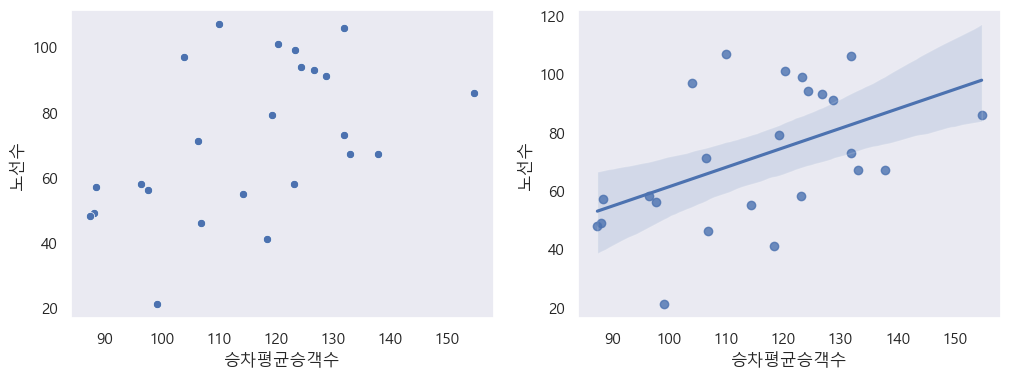

In [90]:
target = '노선수'
var = '승차평균승객수'
data = total_65세추가
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.scatterplot(x=var, y=target, data = data)
plt.grid()
plt.subplot(1,2,2)
sns.regplot(x=var, y = target, data = data)
plt.grid()
plt.show()

In [104]:
result = spst.pearsonr(data[var], data[target])
print(f'상관계수 : {result[0]}, p-value : {result[1]}')

상관계수 : 0.49497339305339044, p-value : 0.013928494663847756


### 2) 노선 수와 택시운송업은 관련이 있다.

In [87]:
# 나는 지금 다른거
business = pd.read_csv('business.csv')
business

,Unnamed: 0,자치구,택시운송업,한식 일반 음식점업,용달 화물자동차 운송업,부동산 중개 및 대리업,두발미용업,커피전문점,남녀용 겉옷 및 셔츠 도매업,기타주점업,일반 교과 학원,한식 육류요리 전문점,사업체수
0,0,종로구,215,1548,618,549,261,948,400,537,110,437,5623
1,1,중구,230,1588,300,576,339,869,10810,381,57,443,15593
2,2,용산구,416,857,455,791,366,634,54,487,104,300,4464
3,3,성동구,1200,956,1072,801,489,547,149,285,258,400,6157
4,4,광진구,1119,963,968,871,746,590,89,633,413,467,6859
5,5,동대문구,1546,1236,1431,842,611,494,211,499,302,442,7614
6,6,중랑구,3634,991,1804,738,790,381,63,535,288,499,9723
7,7,성북구,1835,973,1312,846,739,457,85,512,464,365,7588
8,8,강북구,1713,965,1024,589,673,358,40,580,220,362,6524
9,9,도봉구,2993,672,1571,515,600,288,22,258,351,302,7572


### 3) 고령자수와 (정류장수 또는 평균 이동 시간)이 관련이 있다


## 5.1.3.이변량 분석

* 자료의 종류에 맞게 X --> Y 에 대해서 시각화와 수치화(가설검정)를 수행하고 결과를 평가합니다.
* 가설검정시 다음의 항목을 참조하여 수행합니다.
    * 유의수준 : 5%
    * 숫자 --> 숫자 : 상관분석
    * 범주 --> 범주 : 카이제곱검정
    * 범주 --> 숫자 : t검정, 분산분석
    * 숫자 --> 범주 : 로지스틱 회귀모형을 통해, 회귀계수의 P.value로 검정을 수행합니다.
* 상관계수 (우리가 배운 기준)
    * 강한: 0.5 < |r| <= 1
    * 중간: 0.2 < |r| <= 0.5
    * 약한: 0.1 < |r| <= 0.2
    * (거의)없음: |r| <= 0.1
* p-value 기준 판단 기준
    * P-value < 0.05이면, 두 변수 간에 관계가 있다. (상관계수가 의미가 있다.)
    * P-value >= 0.05이면, 두 변수 간에 관계가 없다. (상관계수가 의미가 없다.)

In [21]:
import scipy.stats as spst

# 아래에 코드를 작성하고 결과를 확인합니다.



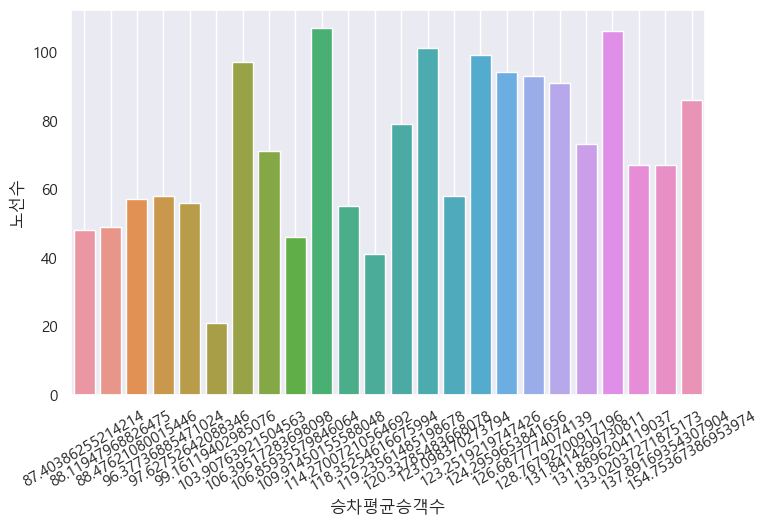

In [103]:
target = '승차평균승객수'
var = '노선수'
data = total_65세추가
plt.figure(figsize=(18,5))

plt.subplot(1,2,1)
sns.barplot(x=target, y=var, data = data)
plt.xticks(rotation = 30)
plt.grid()
plt.show()

,도착 시군구 코드,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,평균 이동 시간(분),이동인구평균,총 이동시간,총 이동인구,남자,여자,계,Unnamed: 0,한식 일반 음식점업.1,커피전문점.1,기타주점업.1,비율1
1,11020,중구,178,103,3776675,3598932,121.020124,115.324511,21.012462,44.516072,9306020,19715322.61,63869,67581,131450,20,6414,3542,982,0.471314
5,11060,동대문구,306,73,5240565,5115379,131.841430,128.692017,21.673451,39.942708,8838130,16288077.28,172318,180274,352592,87,3566,1472,1082,0.583907
20,11210,관악구,466,86,7655819,7792476,154.753674,157.516040,23.377928,49.904036,8772170,18725641.04,250450,249886,500336,340,3689,2049,1672,0.608687
22,11230,강남구,499,91,8030483,7569213,128.767927,121.371512,23.094565,90.226636,11437560,44684651.43,257096,280242,537338,381,11486,7273,2528,0.621382
0,11010,종로구,349,106,5468935,5205394,131.889620,125.534028,21.349599,44.235978,9356120,19385709.60,74018,79666,153684,2,5912,3613,1413,0.638150


,도착 시군구 코드,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,평균 이동 시간(분),이동인구평균,...,총 이동인구,남자,여자,계,Unnamed: 0,한식 일반 음식점업.1,커피전문점.1,기타주점업.1,비율1,비율2
22,11230,강남구,499,91,8030483,7569213,128.767927,121.371512,23.094565,90.226636,...,44684651.43,257096,280242,537338,381,11486,7273,2528,0.621382,125.120308
24,11250,강동구,369,21,2890053,2830506,99.161194,97.118065,25.670084,64.249687,...,21101460.33,227891,237206,465097,432,3388,1660,1349,1.276793,126.506024
23,11240,송파구,415,55,5641742,5603488,114.270072,113.495260,25.429707,83.493581,...,34837613.05,321963,346298,668261,404,5760,3372,1469,0.735588,163.107948
15,11160,강서구,566,49,4681083,4652828,88.119480,87.587591,25.124068,58.447282,...,21839762.06,277797,300629,578426,257,4584,2530,1709,1.209122,193.675889
13,11140,마포구,562,97,5088461,4957596,103.907639,101.235343,22.044201,54.884906,...,23639807.30,176886,201743,378629,221,4705,4475,2559,1.104460,216.759777


## 5.1.4.관계 정리

### 1) 강한 관계의 변수

In [103]:
# 강한 관계의 변수는 무엇인가요?
# 예) 정류장 - 승차 총 승객수

### 2) 중간 관계의 변수

In [104]:
# 중간 관계의 변수는 무엇인가요?
# 예) 노선수 - 커피전문점.1(종사자수)

## 5.1.5.솔루션 도출

### 어느 구에 버스 노선 또는 정류장이 제일 필요한가요? 그 이유는 무엇인가요?

In [105]:
# 솔루션 도출
# 예) 강남구 - 중구 - 동대문구 - 관악구에 필요합니다